🤗 Transformers provides APIs and tools to easily download and train state-of-the-art pretrained models. Using pretrained models can reduce your compute costs, carbon footprint, and save you the time and resources required to train a model from scratch. These models support common tasks in different modalities, such as:

- 📝 Natural Language Processing: text classification, named entity recognition, question answering, language modeling, summarization, translation, multiple choice, and text generation.

- 🖼️ Computer Vision: image classification, object detection, and segmentation.

- 🗣️ Audio: automatic speech recognition and audio classification.

- 🐙 Multimodal: table question answering, optical character recognition, information extraction from scanned documents, video classification, and visual question answering.

In [ ]:
!pip install transformers datasets evaluate accelerate sentencepiece pytesseract

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 33.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 24.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 20.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.wh

# Pipelines for inference

The pipeline() makes it simple to use any model from the Hub for inference on any language, computer vision, speech, and multimodal tasks. Even if you don’t have experience with a specific modality or aren’t familiar with the underlying code behind the models, you can still use them for inference with the pipeline()!

## Text classification

In [ ]:
from transformers import pipeline
pipe = pipeline("text-classification")
pipe("This restaurant is just ok")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that aut

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

[{'label': 'POSITIVE', 'score': 0.9998499155044556}]

We can load the dataset directly

Then take a look at an example:

In [ ]:
from datasets import load_dataset

imdb = load_dataset("stanfordnlp/imdb")
imdb["test"][100]

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

{'text': '"Cover Girl" is a lacklustre WWII musical with absolutely nothing memorable about it, save for its signature song, "Long Ago and Far Away." This film came out before Gene Kelly really hit his artistic stride, and while there are evidences of his burgeoning talent here, mostly he plays sidekick to Rita Hayworth. And there\'s the problem. Rita Hayworth is gorgeous, no doubt about that. But she\'s simply not a compelling screen presence. I\'ve always found myself wanting to like her more than I actually do, and this movie is no exception. She\'s simply not a very good actress, and she\'s not even a very good dancer. Good looking as she is, there\'s something vapid about her, and this movie suffers because of it.<br /><br />Grade: C-',
 'label': 0}

There are two fields in this dataset:

text: the movie review text.

label: a value that is either 0 for a negative review or 1 for a positive review.

In [ ]:
# Load model and tokenizer
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("google-bert/bert-base-uncased")
tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
pipe = pipeline("text-classification", model=model, tokenizer=tokenizer)
pipe(imdb["test"][100]['text'])

[{'label': 'LABEL_0', 'score': 0.6016974449157715}]

In [ ]:
pipe("This restaurant is just ok")

[{'label': 'LABEL_1', 'score': 0.5263798832893372}]

Including a metric during training is often helpful for evaluating your model’s performance.

In [ ]:
import evaluate
from evaluate import evaluator

accuracy = evaluate.load("accuracy")

task_evaluator = evaluator("text-classification")

data = load_dataset("imdb", split="test").shuffle(seed=42).select(range(1000))

results = task_evaluator.compute(model_or_pipeline=pipe, data=data, metric=accuracy,
                       label_mapping={"LABEL_0": 0, "LABEL_1": 1})

print(results)

Generating train split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/25000 [00:00<?, ? examples/s]

Generating unsupervised split:   0%|          | 0/50000 [00:00<?, ? examples/s]

{'accuracy': 0.512, 'total_time_in_seconds': 887.4538455400002, 'samples_per_second': 1.1268191636394538, 'latency_in_seconds': 0.8874538455400002}


In [ ]:
task_evaluator = evaluator("sentiment-analysis")
pipe_imdb = pipeline("sentiment-analysis", model="saiffff/distilbert-imdb-sentiment")
pipe_imdb(imdb["test"][100]['text'])

[{'label': 'LABEL_0', 'score': 0.9873145818710327}]

In [ ]:
results = task_evaluator.compute(model_or_pipeline=pipe_imdb, data=data, metric=accuracy,
                       label_mapping={"LABEL_0": 0, "LABEL_1": 1})
print(results)

{'accuracy': 0.921, 'total_time_in_seconds': 489.6278941319997, 'samples_per_second': 2.042367299707823, 'latency_in_seconds': 0.48962789413199964}


In [ ]:
from transformers import AutoModelForCausalLM, AutoTokenizer

model_id = "mistralai/Mistral-7B-v0.1"
tokenizer = AutoTokenizer.from_pretrained(model_id)

model = AutoModelForCausalLM.from_pretrained(model_id)

text = "Hello my name is"
inputs = tokenizer(text, return_tensors="pt")

outputs = model.generate(**inputs, max_new_tokens=20)
print(tokenizer.decode(outputs[0], skip_special_tokens=True))


OSError: You are trying to access a gated repo.
Make sure to have access to it at https://huggingface.co/mistralai/Mistral-7B-v0.1.
401 Client Error. (Request ID: Root=1-66579c83-24577be67c19f4370fb0605d;4ff19b64-adfc-4d25-ae40-e127d41db217)

Cannot access gated repo for url https://huggingface.co/mistralai/Mistral-7B-v0.1/resolve/main/config.json.
Access to model mistralai/Mistral-7B-v0.1 is restricted. You must be authenticated to access it.

### Sentiment in other languages

In [ ]:
pipe("Gosto muito de Redes Neurais e Aprendizado Profundo")

[{'label': 'LABEL_0', 'score': 0.5406339168548584}]

In [ ]:
pipe_portuguese = pipeline("sentiment-analysis", model='lps08/bert-base-portuguese-cased-editals', device=0)
pipe_portuguese("Gosto muito de Redes Neurais e Aprendizado Profundo")

config.json:   0%|          | 0.00/926 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.29k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/210k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

[{'label': 'LABEL_1', 'score': 0.5986766219139099}]

### Translation ✍️



In [ ]:
en_pt_pipe = pipeline("translation", model="Helsinki-NLP/opus-mt-tc-big-en-pt")
en_pt_pipe("This is a test of how well this model works")

config.json:   0%|          | 0.00/1.08k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/465M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/337 [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/803k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/825k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.38M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


[{'translation_text': 'Este é um teste de quão bem este modelo funciona'}]

In [ ]:
text = "Nova School of Business & Economics (Nova SBE) is a business school located in Portugal that offers a wide range of academic programs including Bachelor's, Master's, Ph.D., MBA, Executive Education programs. The school has approximately 3,000 students from over 70 different countries. Its programs have received recognition from various academic rankings, such as the Financial Times Ranking,[1] The Economist,[2] Eduniversal,[3] Times Higher Education[4] and QS World Rankings.[5]"
en_pt_pipe(text)

[{'translation_text': 'Nova SBE é uma escola de negócios localizada em Portugal que oferece uma ampla gama de programas acadêmicos, incluindo bacharelado, mestrado, doutorado, MBA, programas de educação executiva. A escola tem aproximadamente 3.000 alunos de mais de 70 países diferentes. Seus programas receberam reconhecimento de vários rankings acadêmicos, como o Financial Times Ranking,[1] The Economist,[2] Eduniversal,[3] Times Higher Education[4] e QS World Rankings.[5]'}]

### Summarization

Another really useful NLP task is summarizing a large amount of information into a very small amount of words. BART is a model that performs well on tasks like summarization; it contains a combination of two models you've already seen briefly in the lecture - the BERT model and and autogressive style GPT model - check out this link for some more information on it.

Since BART models can be quite large, try to find the distilbart-xsum-12-6 model on HuggingFace which is one of the smallest distillations available (we'll talk more about distillations later!). Integrate that model into a "summarization" pipeline, then take some text (e.g. perhaps by copy-pasting or scraping from a BBC article) and summarize it with your pipeline!

In [ ]:
summary_pipe = pipeline("summarization", model="sshleifer/distilbart-xsum-12-6")

summary_pipe(text)

[{'summary_text': " The Nova School of Business & Economics is one of the world's leading business schools."}]

### Question Answering 🔍

In [ ]:
# $CHALLENGIFY_BEGIN
questions_pipe = pipeline("question-answering", model="deepset/roberta-base-squad2")
questions_pipe(
    question = "Where is Nova SBE?",
    context = text
)

{'score': 0.9760395884513855, 'start': 79, 'end': 87, 'answer': 'Portugal'}

### Image classfication: Cat or Dog?



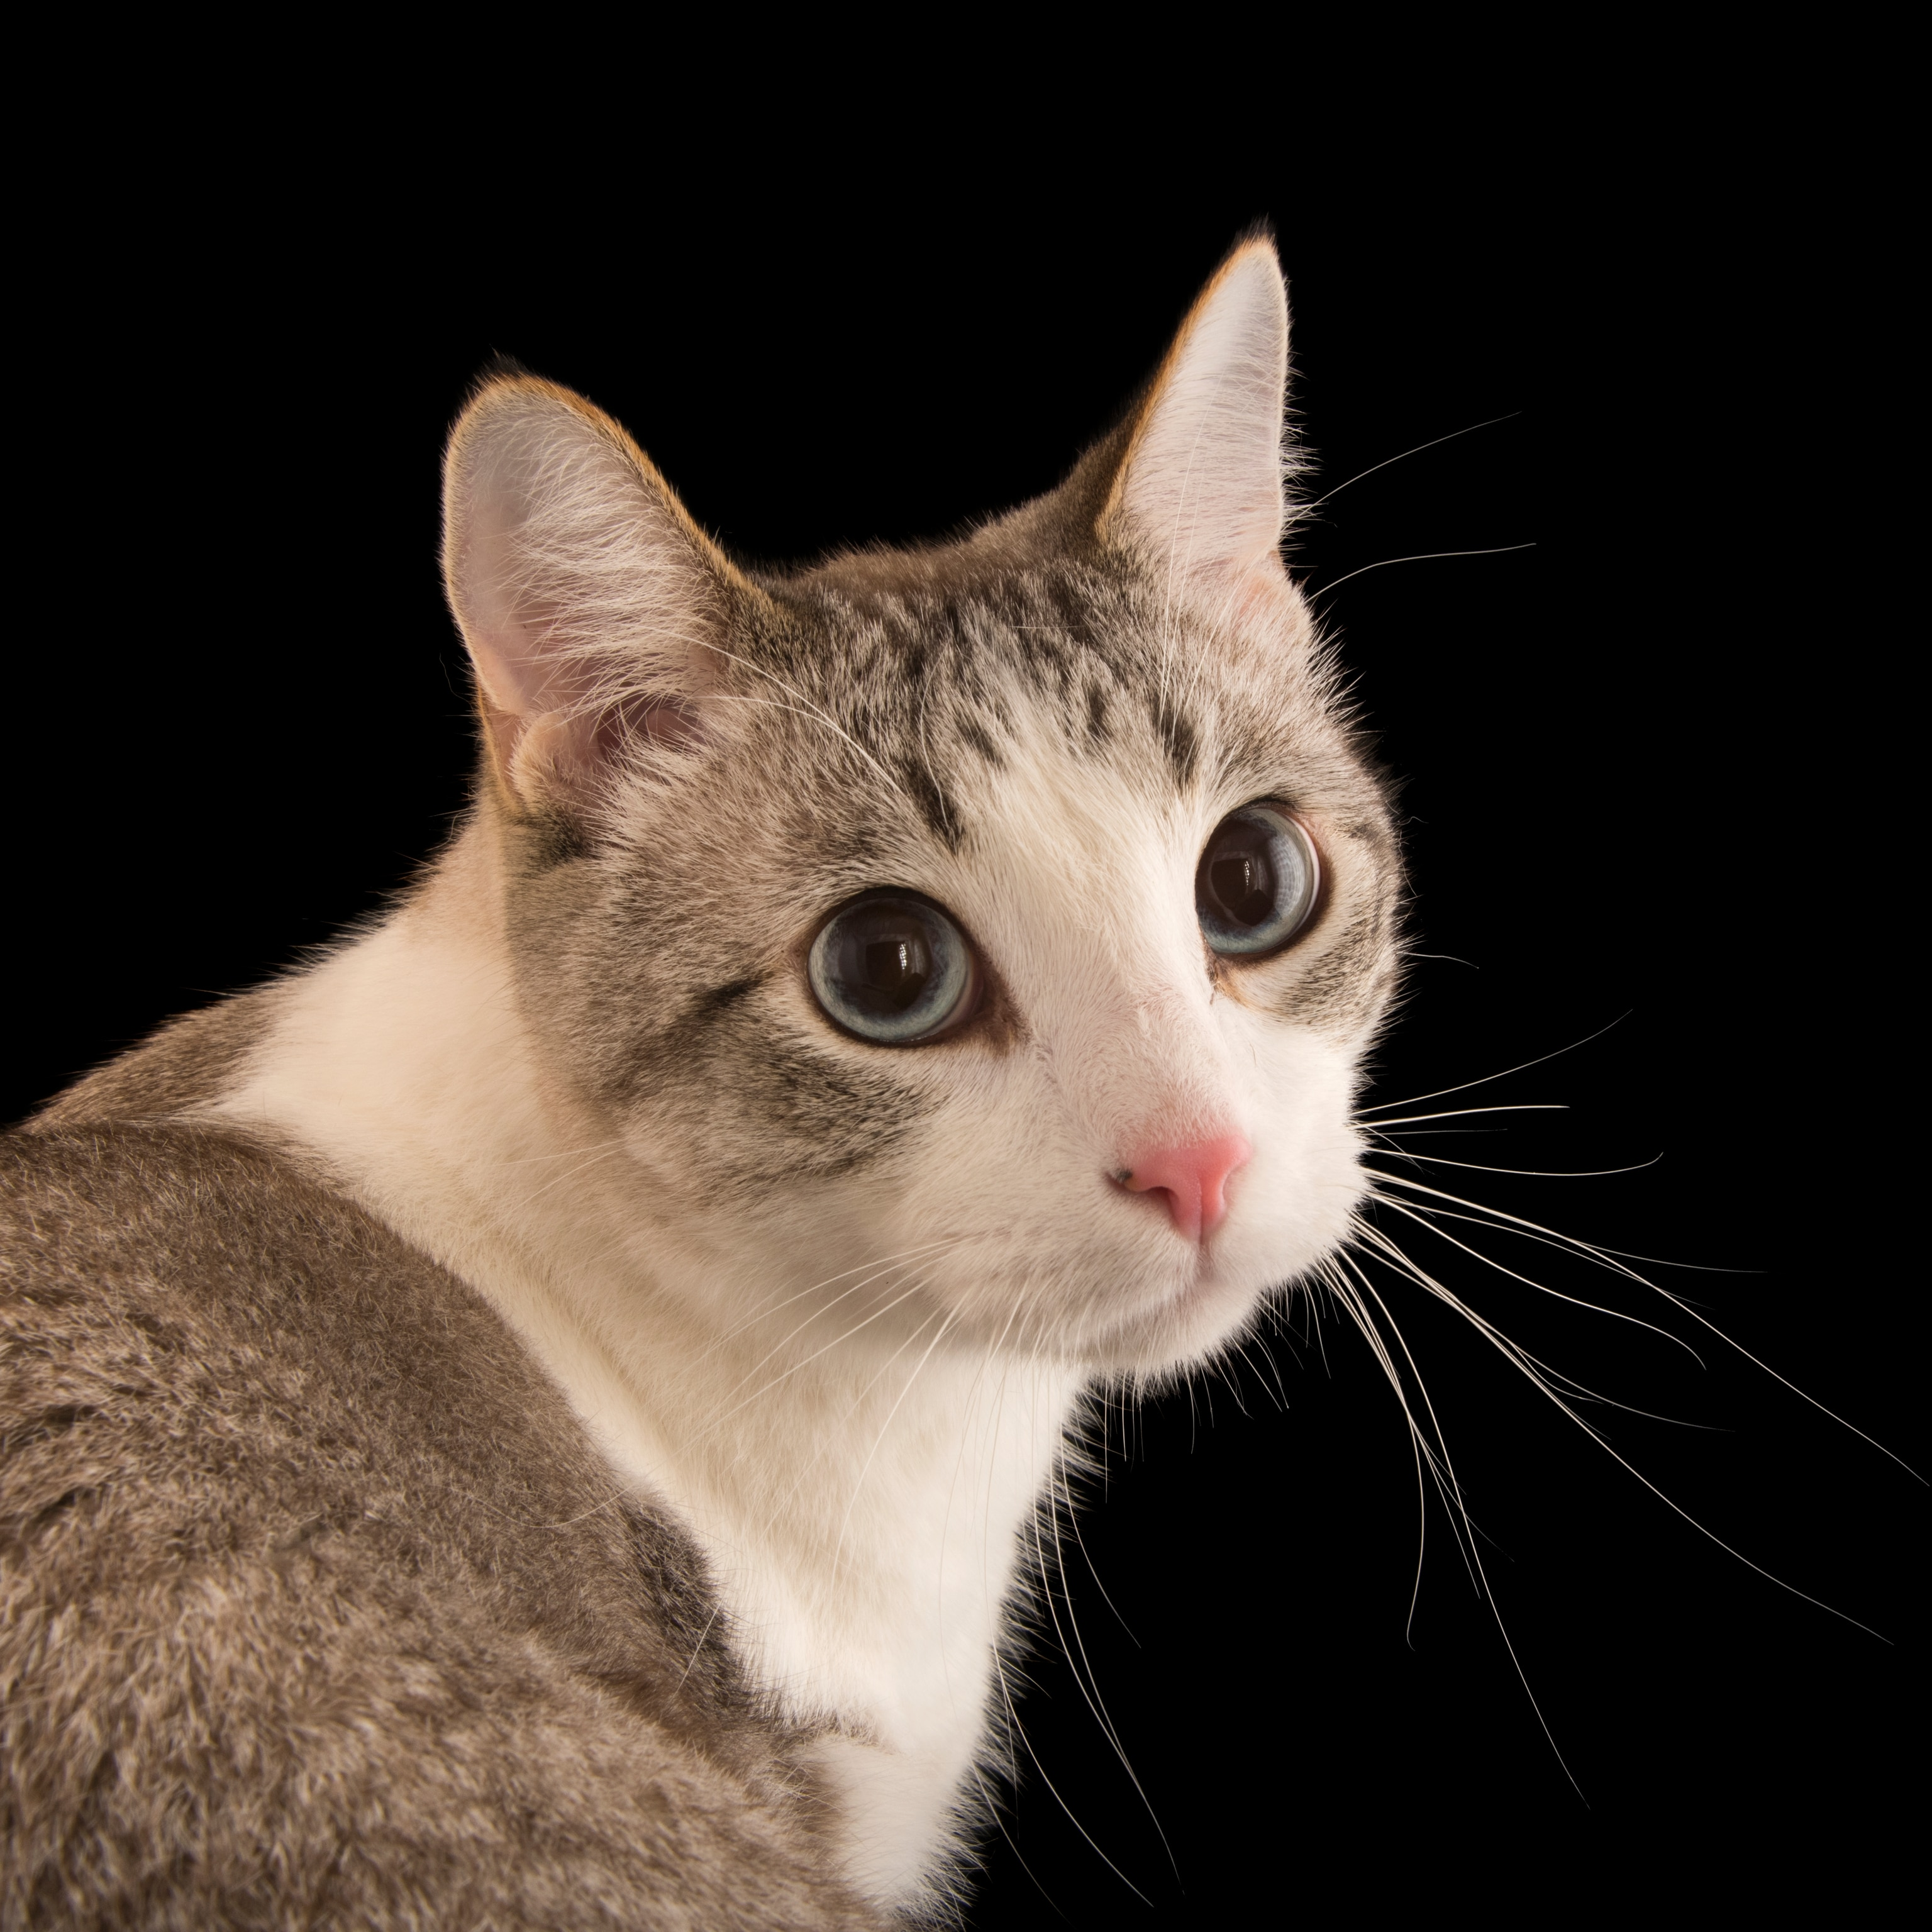

In [ ]:
url = "https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187_square.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image

In [ ]:
from transformers import pipeline
clf = pipeline("image-classification")
clf(image)

No model was supplied, defaulted to google/vit-base-patch16-224 and revision 5dca96d (https://huggingface.co/google/vit-base-patch16-224).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'label': 'Egyptian cat', 'score': 0.6443243622779846},
 {'label': 'tiger cat', 'score': 0.19439539313316345},
 {'label': 'tabby, tabby cat', 'score': 0.11759155243635178},
 {'label': 'lynx, catamount', 'score': 0.013742078095674515},
 {'label': 'Siamese cat, Siamese', 'score': 0.0016279529081657529}]

### Image Segmentation

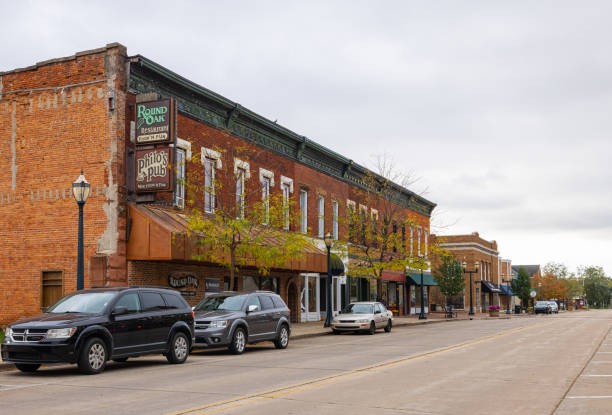

In [ ]:


url = "https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/transformers/tasks/segmentation_input.jpg"
image = Image.open(requests.get(url, stream=True).raw)
image

In [ ]:
semantic_segmentation = pipeline("image-segmentation", "nvidia/segformer-b1-finetuned-cityscapes-1024-1024")
results = semantic_segmentation(image)
results

config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/54.8M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/273 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/segformer/image_processing_segformer.py:103: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


[{'score': None,
  'label': 'road',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'sidewalk',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'building',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'wall',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'pole',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'traffic sign',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'vegetation',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'terrain',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'sky',
  'mask': <PIL.Image.Image image mode=L size=612x415>},
 {'score': None,
  'label': 'car',
  'mask': <PIL.Image.Image image mode=L size=612x415>}]

Taking a look at the mask for the car class, we can see every car is classified with the same mask.

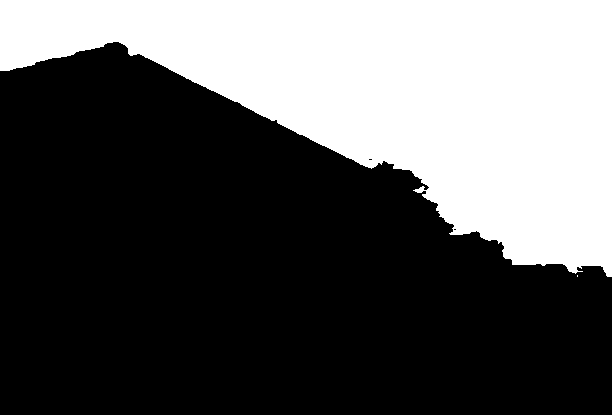

In [ ]:
results[-2]["mask"]

# Generative AI

In this part, we will use Google's Gemini (https://blog.google/technology/ai/google-gemini-ai/#sundar-note), a family of multimodal large language models developed by Google DeepMind. Now Google provide Gemini API to allow you to explore the Generative AI for free!

In order to use the service, you need to register for Gemini API from Google AI studio: (https://makersuite.google.com/app/apikey). You can click Create API key for new project in order to get the key. Then, you may copy/paste the API key to the Google Colab Secrets on the left bar (you should see a key symbol). Fill in Name as GOOGLE_API_KEY and Value as your key. Enable the Notebook access and restart the colab. Then you should be good to go run the following code. Note that you only need to configure this for once. If you encountered error later such as "Secret not found", you need to check whether you have configured key correctly or not.

In [ ]:
!pip install -q -U google-generativeai
import textwrap


import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [ ]:
#@title Configure Gemini API key

#Access your Gemini API key

import google.generativeai as genai
from google.colab import userdata

gemini_api_secret_name = 'GOOGLE_API_KEY'  # @param {type: "string"}

try:
  GOOGLE_API_KEY=userdata.get(gemini_api_secret_name)
  genai.configure(api_key=GOOGLE_API_KEY)
except userdata.SecretNotFoundError as e:
   print(f'Secret not found\n\nThis expects you to create a secret named {gemini_api_secret_name} in Colab\n\nVisit https://makersuite.google.com/app/apikey to create an API key\n\nStore that in the secrets section on the left side of the notebook (key icon)\n\nName the secret {gemini_api_secret_name}')
   raise e
except userdata.NotebookAccessError as e:
  print(f'You need to grant this notebook access to the {gemini_api_secret_name} secret in order for the notebook to access Gemini on your behalf.')
  raise e
except Exception as e:
  # unknown error
  print(f"There was an unknown error. Ensure you have a secret {gemini_api_secret_name} stored in Colab and it's a valid key from https://makersuite.google.com/app/apikey")
  raise e

model = genai.GenerativeModel('gemini-pro')

In [ ]:
response = model.generate_content("What is the meaning of life?")

In [ ]:
to_markdown(response.text)

> The meaning of life is a question that has been pondered by philosophers, theologians, and scientists for centuries. There is no one answer that is universally accepted, as the meaning of life is a personal and subjective experience. For some, the meaning of life may be found in relationships with others, while others may find meaning through their work or creative pursuits. Still others may find meaning in their spiritual or religious beliefs. Ultimately, the meaning of life is something that each individual must discover for themselves.
> 
> Some common themes that emerge when people discuss the meaning of life include:
> 
> * **Purpose:** Many people find meaning in life by having a sense of purpose. This could be a personal goal, a career ambition, or a desire to make a difference in the world. When people feel like they are working towards something meaningful, they often feel more fulfilled and satisfied with their lives.
> * **Relationships:** Relationships with other people are an important source of meaning for many people. Having close friends, family members, and loved ones can provide a sense of connection, support, and belonging.
> * **Creativity:** Creative pursuits, such as art, music, writing, and dance, can also provide a sense of meaning and fulfillment. When people are able to express themselves creatively, they often feel more connected to themselves and to the world around them.
> * **Spirituality:** For many people, spirituality is a source of meaning and purpose in life. Religious beliefs and practices can provide a framework for understanding the world and our place in it. They can also offer comfort and support in times of difficulty.
> 
> Ultimately, the meaning of life is a personal and subjective experience. There is no one answer that is universally accepted. The best way to find meaning in life is to explore different possibilities and see what resonates with you.

In [ ]:
response = model.generate_content("What is the meaning of life?", stream=True)

In [ ]:
for chunk in response:
  print(chunk.text)
  print("_"*80)

The meaning of life is a deep and complex philosophical question that has been pondered by
________________________________________________________________________________
 humans for thousands of years. There is no single, universally accepted answer, as the meaning of life is subjective and varies from person to person. However, some
________________________________________________________________________________
 common themes that have emerged in discussions about the meaning of life include:

* **Purpose or fulfillment:** Many people find meaning in life through their work, hobbies, or other activities that give them a sense of purpose or fulfillment. This could include raising a family, helping others, or pursuing creative or intellectual endeavors.

________________________________________________________________________________
* **Relationships:** Social connections and relationships with others are important to many people's sense of meaning. Having a strong support network o

## Generate text from image and text inputs

Gemini provides a multimodal model (`gemini-pro-vision`) that accepts both text and images and inputs. The `GenerativeModel.generate_content` API is designed to handle multimodal prompts and returns a text output.

Let's include an image:

In [ ]:
!curl -o image.jpg https://t0.gstatic.com/licensed-image?q=tbn:ANd9GcQ_Kevbk21QBRy-PgB4kQpS79brbmmEG7m3VOTShAn4PecDU5H5UxrJxE3Dw1JiaG17V88QIol19-3TM2wCHw

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  405k  100  405k    0     0  1408k      0 --:--:-- --:--:-- --:--:-- 1406k


In [ ]:
import PIL.Image

img = PIL.Image.open('image.jpg')
img

Use the `gemini-pro-vision` model and pass the image to the model with `generate_content`.

In [ ]:
model = genai.GenerativeModel('gemini-pro-vision')

In [ ]:
response = model.generate_content(img)

to_markdown(response.text)

>  These are two glass containers with food. Each container has rice, chicken, broccoli, and carrots. The containers are sitting on a gray table.

To provide both text and images in a prompt, pass a list containing the strings and images:

In [ ]:
response = model.generate_content(["Write a short, engaging blog post based on this picture. It should include a description of the meal in the photo and talk about my journey meal prepping.", img], stream=True)
response.resolve()

In [ ]:
to_markdown(response.text)

>  Meal prepping can be daunting, but it's so worth it when you have delicious and healthy meals ready to go on busy weeknights, When I first started meal prepping, I was overwhelmed by all the different recipes and options. I didn't know where to start. But after a little bit of trial and error, I found a system that works for me.
> 
> The key is to keep it simple. I usually choose a few recipes that I know I like and that are easy to make. I also try to use ingredients that are versatile so that I can use them in multiple dishes. This week, I'm sharing my favorite meal prep recipe: teriyaki chicken with brown rice and vegetables. This dish is packed with protein and fiber, and it's also super flavorful. Plus, it's easy to make ahead of time and store in the refrigerator or freezer.
> 
> To make this dish, you'll need the following ingredients:
> 
> * 1 pound of boneless, skinless chicken breasts, cut into strips
> * 1 tablespoon of olive oil
> * 1/2 cup of teriyaki sauce
> * 1/4 cup of water
> * 1 tablespoon of cornstarch
> * 2 cups of brown rice, cooked
> * 2 cups of vegetables, such as broccoli, carrots, and bell peppers
> 
> Instructions:
> 
> 1. Heat the olive oil in a large skillet over medium heat.
> 2. Add the chicken strips and cook until browned on all sides.
> 3. Add the teriyaki sauce, water, and cornstarch to the skillet.
> 4. Bring to a boil, then reduce heat and simmer for 5 minutes, or until the sauce has thickened.
> 5. Stir in the cooked brown rice and vegetables.
> 6. Serve immediately or store in the refrigerator or freezer for later.
> 
> This teriyaki chicken with brown rice and vegetables is a delicious and healthy meal that's perfect for meal prepping. It's easy to make, and it's packed with protein and fiber. Plus, it's versatile so that you can use different vegetables or protein sources. I hope you enjoy this recipe as much as I do!

## Chat conversations

Gemini enables you to have freeform conversations across multiple turns. The `ChatSession` class simplifies the process by managing the state of the conversation, so unlike with `generate_content`, you do not have to store the conversation history as a list.

Initialize the chat:

In [ ]:
model = genai.GenerativeModel('gemini-pro')
chat = model.start_chat(history=[])
chat

The `ChatSession.send_message` method returns the same `GenerateContentResponse` type as `GenerativeModel.generate_content`. It also appends your message and the response to the chat history:

In [ ]:
response = chat.send_message("In one sentence, explain how a computer works to a young child.")
to_markdown(response.text)

> A computer is like a very smart robot that can think and store information, and it uses its brain (the processor) to follow instructions (programs) to do many things, like helping people with their work and school.

In [ ]:
response = chat.send_message("Okay, how about a more detailed explanation to a high schooler?", stream=True)

for chunk in response:
  print(chunk.text)
  print("_"*80)

A computer is an electronic device that can be programmed to carry out a set of
________________________________________________________________________________
 instructions. It consists of hardware, the physical components of the computer, and software, the instructions that tell the hardware what to do. The hardware includes the processor
________________________________________________________________________________
, memory, storage devices, input devices (such as keyboard and mouse), and output devices (such as monitor and printer). The software includes the operating system, which manages the hardware and provides basic services, and application software, which performs specific tasks for the user, such as word processing, web browsing, or playing games
________________________________________________________________________________
. When a user enters instructions or data into the computer, the processor reads and interprets the instructions, performs calculations and operati

### Multi-turn conversations

While the `genai.ChatSession` class shown earlier can handle many use cases, it does make some assumptions. If your use case doesn't fit into this chat implementation it's good to remember that `genai.ChatSession` is just a wrapper around `GenerativeModel.generate_content`. In addition to single requests, it can handle multi-turn conversations.

The individual messages are `glm.Content` objects or compatible dictionaries, as seen in previous sections. As a dictionary, the message requires `role` and `parts` keys. The `role` in a conversation can either be the `user`, which provides the prompts, or `model`, which provides the responses.

Pass a list of `glm.Content` objects and it will be treated as multi-turn chat:

In [ ]:
messages = [
    {'role':'user',
     'parts': ["Briefly explain how a computer works to a young child."]}
]
response = model.generate_content(messages)

to_markdown(response.text)

> A computer works in three main parts:
> 
> 1. Input: This is how you talk to the computer. You can type on a keyboard, move a mouse, or use a touch screen.
> 
> 2. Output: This is how the computer talks to you. It can show you things on a screen, make sounds, and even print out paper.
> 
> 3. The Brain: This is the part that does the work. It's called a processor. It takes your instructions from the input and sends information to the output.
> 
> The processor is very fast. It can do millions of simple steps every second. This is why computers can do so many things, like playing games, watching movies, and helping you with your homework.

To continue the conversation, add the response and another message.

In [ ]:
messages.append({'role':'model',
                 'parts':[response.text]})

messages.append({'role':'user',
                 'parts':["Okay, how about a more detailed explanation to a high school student?"]})

response = model.generate_content(messages)

to_markdown(response.text)

> A computer is an electronic device that can be programmed to carry out a set of instructions. It operates on the basic principles of input, processing, output, and storage.
> 
> **Input**
> 
> Input devices allow the user to communicate with the computer. Common input devices include keyboards, mice, touch screens, scanners, and microphones. These devices convert data into a form that the computer can understand.
> 
> **Processing**
> 
> The processor, also known as the central processing unit (CPU), is the brain of the computer. It is responsible for carrying out the instructions of a computer program. The CPU consists of control unit and arithmetic logic unit. The control unit fetches instructions from memory and decodes them. The arithmetic logic unit performs arithmetic and logical operations on data.
> 
> **Output**
> 
> Output devices allow the computer to communicate with the user. Common output devices include monitors, printers, speakers, and projectors. These devices convert data from a form that the computer can understand into a form that humans can understand.
> 
> **Storage**
> 
> Storage devices are used to store data and programs. Common storage devices include hard disk drives, solid state drives, and USB flash drives. These devices allow the computer to store data even when it is turned off.
> 
> **How a Computer Works**
> 
> When a user enters data into a computer using an input device, the data is stored in the computer's memory. The CPU then fetches the instructions for the program that is to be executed from memory and decodes them. The CPU then carries out the instructions, which may involve performing calculations, making decisions, and storing data. Once the instructions have been carried out, the results are stored in memory or sent to an output device.
> 
> Computers are incredibly versatile machines that can be used for a wide variety of tasks, including word processing, spreadsheets, presentations, graphic design, video editing, gaming, and much more.
> 
> **High-Level Explanation for a High School Student**
> 
> Imagine that you are a chef and you are following a recipe to make a cake. The recipe is like a computer program. The ingredients are like the data that you input into the computer. The steps in the recipe are like the instructions in a computer program. As you follow the recipe, you are processing the data and producing an output (the cake).
> 
> In a computer, the processor is like the chef, the memory is like the recipe book, and the input and output devices are like the tools and utensils that you use to make the cake.
> 
> Computers are much faster and more powerful than humans, so they can do many things that humans cannot do. For example, computers can perform complex calculations, store and retrieve large amounts of data, and communicate with other computers over the internet.

In [ ]:
!pip install diffusers --upgrade
!pip install invisible_watermark transformers accelerate safetensors


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 9.7 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux

In [ ]:
from diffusers import DiffusionPipeline
import torch

pipe = DiffusionPipeline.from_pretrained("stabilityai/stable-diffusion-xl-base-1.0", torch_dtype=torch.float16, use_safetensors=True, variant="fp16")
pipe.to("cuda")

# if using torch < 2.0
# pipe.enable_xformers_memory_efficient_attention()

prompt = "An astronaut riding a green horse"

images = pipe(prompt=prompt).images[0]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

In [ ]:
images